In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Data Source:https://unstats.un.org/sdgs/UNSDGAPIV5/swagger/index.html
un_goals = pd.read_csv("Resources/UN_Goals.csv")

un_goals_clean = un_goals[["Target", 'GeoAreaName', 'TimePeriod', 'Value', '[Units]']]
un_goals_clean.head()

,Target,GeoAreaName,TimePeriod,Value,[Units]
0,13.2,Canada,1990,601.52369,MT_CO2E
1,13.2,Canada,1991,595.77673,MT_CO2E
2,13.2,Canada,1992,613.59852,MT_CO2E
3,13.2,Canada,1993,616.79839,MT_CO2E
4,13.2,Canada,1994,638.00047,MT_CO2E


In [3]:
un_goals_count = len(un_goals_clean['Target'].value_counts())
un_goals_count

2

In [4]:
total_un_goals_clean=un_goals_clean.groupby('TimePeriod').agg({'Value':["mean","median","min","max"]})
total_un_goals_clean


Value                                 
                  mean     median        min        max
TimePeriod                                             
1990        601.523690  601.52369  601.52369  601.52369
1991        595.776730  595.77673  595.77673  595.77673
1992        613.598520  613.59852  613.59852  613.59852
1993        616.798390  616.79839  616.79839  616.79839
1994        638.000470  638.00047  638.00047  638.00047
1995        656.298720  656.29872  656.29872  656.29872
1996        678.714490  678.71449  678.71449  678.71449
1997        691.195370  691.19537  691.19537  691.19537
1998        696.901520  696.90152  696.90152  696.90152
1999        709.600920  709.60092  709.60092  709.60092
2000        733.511340  733.51134  733.51134  733.51134
2001        722.935010  722.93501  722.93501  722.93501
2002        726.555180  726.55518  726.55518  726.55518
2003        744.831890  744.83189  744.83189  744.83189
2004        745.919780  745.91978  745.91978  745.91978
2005        738.718600  738.71860  738.71860  738.71860
2006        730.101940  730.10194  730.10194  730.10194
2007        751.661270  751.66127  751.66127  751.66127
2008        735.692850  735.69285  735.69285  735.69285
2009        693.597900  693.59790  693.59790  693.59790
2010        702.802750  702.80275  702.80275  702.80275
2011         57.538465    2.77000    0.17000  714.07851
2012         57.797314    2.35000    0.05000  717.17239
2013         61.232989    3.63500    0.06000  725.37184
2014         61.589119    3.14500    0.12000  722.55767
2015         62.814001    3.75000    0.19000  723.09602
2016         62.818851    4.55500    0.19000  706.93391
2017         62.510859    5.73500    0.00001  716.09201
2018         64.942728    6.72000    0.00010  728.47589
2019        730.244940  730.24494  730.24494  730.24494

In [5]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

canada_result = pd.read_csv("Resources/Economic_Sector_Canada.csv")
canada_result.head()


,Sectors - Mt CO2 eq,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NATIONAL TOTAL,595,588,605,608,628,645,667,682,689,...,721,726,732,730,733,715,725,740,738,672
1,Oil and Gas,103,102,111,118,122,128,135,137,141,...,187,194,199,205,205,194,196,205,203,179
2,Electricity,95,96,103,93,95,98,98,109,122,...,87,83,80,76,80,74,73,63,62,56
3,Transport,120,114,115,117,121,122,126,131,137,...,168,171,174,171,172,173,179,184,185,159
4,Heavy Industry,97,97,95,94,100,100,103,103,98,...,80,80,79,79,78,76,76,77,77,72


In [6]:
#transposed
df1 = canada_result.set_index(['Sectors - Mt CO2 eq'])
df2 = df1.transpose()
df3 = df2[['Oil and Gas', 'Electricity', 'Transport','NATIONAL TOTAL']]
df4 = df3.reset_index()
transpose_can_result = df4.rename(columns={'index':'Years'})
transpose_can_result

Sectors - Mt CO2 eq,Years,Oil and Gas,Electricity,Transport,NATIONAL TOTAL
0,1990,103,95,120,595
1,1991,102,96,114,588
2,1992,111,103,115,605
3,1993,118,93,117,608
4,1994,122,95,121,628
5,1995,128,98,122,645
6,1996,135,98,126,667
7,1997,137,109,131,682
8,1998,141,122,137,689
9,1999,150,119,143,702


In [7]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

provices_result = pd.read_csv("Resources/Economic_Sector_Prov.csv")
provices_result.head()


,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt


In [8]:
provices_result

,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt
...,...,...,...,...,...,...
3924,2020,Yukon,3924,Transport,0.41,Mt
3925,2020,Yukon,3925,Heavy Industry,0.03,Mt
3926,2020,Yukon,3926,Buildings,0.04,Mt
3927,2020,Yukon,3927,Waste,0.04,Mt


In [9]:
alberta = provices_result[provices_result["Region"] == "Alberta"]
ontario = provices_result[provices_result["Region"] == "Ontario"]
quebec = provices_result[provices_result["Region"] == "Quebec"]

alberta.loc[:, "CO2eq"] = pd.to_numeric(alberta["CO2eq"], errors="coerce")

alberta_scores_mean = alberta.groupby(["Source"])["CO2eq"].mean()
alberta_scores_median = alberta.groupby(["Source"]).median()
alberta_scores_mode = alberta.groupby(["Source"])["CO2eq"].apply(lambda x: x.mode()[0])
alberta_scores_std = alberta.groupby(["Source"])["CO2eq"].std()
alberta_scores_var = alberta.groupby(["Source"])["CO2eq"].var()
alberta_scores_sem = alberta.groupby(["Source"])["CO2eq"].sem()

alberta_scores = pd.DataFrame({
    "Mean": alberta_scores_mean,
    "Median": alberta_scores_median["CO2eq"],
    "Mode": alberta_scores_mode,
    "STD": alberta_scores_std,
    "Variance": alberta_scores_var,
    "SEM": alberta_scores_sem
})

alberta_scores.index.name = None

alberta_scores




C:\Users\hp\AppData\Local\Temp\ipykernel_7356\2949162221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alberta.loc[:, "CO2eq"] = pd.to_numeric(alberta["CO2eq"], errors="coerce")


,Mean,Median,Mode,STD,Variance,SEM
Agriculture,19.082903,19.41,20.13,1.498130,2.244395,0.269072
Buildings,16.641613,17.11,13.93,3.191372,10.184854,0.573187
Coal Production,0.597742,0.61,0.56,0.149303,0.022291,0.026816
Electricity,44.688387,46.36,48.53,5.400612,29.166607,0.969979
Heavy Industry,16.412258,16.69,17.33,1.770031,3.133011,0.317907
"Light Manufacturing, Construction and Forest Resources",3.361935,2.97,2.19,0.940438,0.884423,0.168908
Oil and Gas,105.891935,105.34,61.96,27.378640,749.589943,4.917349
Provincial Inventory Total,234.106129,237.09,165.65,36.926638,1363.576591,6.632220
Transport,23.670968,23.17,14.18,6.351657,40.343542,1.140791
Waste,3.758710,3.72,2.25,0.957270,0.916365,0.171931


In [10]:
alberta = provices_result[provices_result["Region"] == "Alberta"]
ontario = provices_result[provices_result["Region"] == "Ontario"]
quebec = provices_result[provices_result["Region"] == "Quebec"]


ontario.loc[:, "CO2eq"] = pd.to_numeric(ontario["CO2eq"], errors="coerce")

ontario_scores_mean = ontario.groupby(["Source"])["CO2eq"].mean()
ontario_scores_median = ontario.groupby(["Source"]).median()
ontario_scores_mode = ontario.groupby(["Source"])["CO2eq"].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
ontario_scores_std = ontario.groupby(["Source"])["CO2eq"].std()
ontario_scores_var = ontario.groupby(["Source"])["CO2eq"].var()
ontario_scores_sem = ontario.groupby(["Source"])["CO2eq"].sem()

ontario_scores = pd.DataFrame({
    "Mean": ontario_scores_mean,
    "Median": ontario_scores_median["CO2eq"],
    "STD": ontario_scores_std,
    "Variance": ontario_scores_var,
    "SEM": ontario_scores_sem
})

ontario_scores.index.name = None

ontario_scores


C:\Users\hp\AppData\Local\Temp\ipykernel_7356\701745538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario.loc[:, "CO2eq"] = pd.to_numeric(ontario["CO2eq"], errors="coerce")


,Mean,Median,STD,Variance,SEM
Agriculture,11.756774,11.71,0.468191,0.219203,0.084090
Buildings,33.639355,33.67,3.329572,11.086053,0.598009
Electricity,21.405161,20.45,13.034502,169.898252,2.341066
Heavy Industry,35.741290,35.31,6.496705,42.207172,1.166843
"Light Manufacturing, Construction and Forest Resources",10.178710,10.27,1.121510,1.257785,0.201429
Oil and Gas,10.505161,10.91,1.687997,2.849332,0.303173
Provincial Inventory Total,181.908710,179.67,16.831430,283.297025,3.023014
Transport,50.650645,54.03,6.264606,39.245286,1.125156
Waste,8.030968,8.12,0.436397,0.190442,0.078379


In [11]:
alberta = provices_result[provices_result["Region"] == "Alberta"]
ontario = provices_result[provices_result["Region"] == "Ontario"]
quebec = provices_result[provices_result["Region"] == "Quebec"]

quebec.loc[:, "CO2eq"] = pd.to_numeric(quebec["CO2eq"], errors="coerce")

quebec_scores_mean = quebec.groupby(["Source"])["CO2eq"].mean()
quebec_scores_median = quebec.groupby(["Source"]).median()
quebec_scores_mode = quebec.groupby(["Source"])["CO2eq"].apply(lambda x: x.mode()[0])
quebec_scores_std = quebec.groupby(["Source"])["CO2eq"].std()
quebec_scores_var = quebec.groupby(["Source"])["CO2eq"].var()
quebec_scores_sem = quebec.groupby(["Source"])["CO2eq"].sem()

quebec_scores = pd.DataFrame({
    "Mean": quebec_scores_mean,
    "Median": quebec_scores_median["CO2eq"],
    "Mode": quebec_scores_mode,
    "STD": quebec_scores_std,
    "Variance": quebec_scores_var,
    "SEM": quebec_scores_sem
})

quebec_scores.index.name = None

quebec_scores

C:\Users\hp\AppData\Local\Temp\ipykernel_7356\1574761046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quebec.loc[:, "CO2eq"] = pd.to_numeric(quebec["CO2eq"], errors="coerce")


,Mean,Median,Mode,STD,Variance,SEM
Agriculture,8.315806,8.30,8.18,0.368599,0.135865,0.066202
Buildings,11.174839,11.20,9.09,1.149437,1.321206,0.206445
Electricity,0.706129,0.48,0.26,0.575805,0.331551,0.103418
Heavy Industry,19.928065,19.54,15.31,3.098318,9.599576,0.556474
"Light Manufacturing, Construction and Forest Resources",4.398387,4.35,3.97,0.349753,0.122327,0.062818
Oil and Gas,3.424839,3.73,2.63,0.776328,0.602686,0.139433
Provincial Inventory Total,82.630323,82.93,80.14,3.238287,10.486503,0.581614
Transport,29.203548,30.45,30.85,3.322981,11.042204,0.596825
Waste,5.477097,5.37,4.98,0.537861,0.289295,0.096603


In [12]:
   
    
    quartiles = treatment_data.quantile([.25,.5,.75]) 
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_data.loc[(treatment_data< lower_bound) | (treatment_data> upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

NameError: name 'treatment_data' is not defined

# VISUALISATION

In [13]:
Canada_df =  transpose_can_result.groupby('Years').sum()[["Oil and Gas","Electricity","Transport"]]
Canada_df 

Sectors - Mt CO2 eq,Oil and Gas,Electricity,Transport
Years,,,
1990,103,95,120
1991,102,96,114
1992,111,103,115
1993,118,93,117
1994,122,95,121
1995,128,98,122
1996,135,98,126
1997,137,109,131
1998,141,122,137


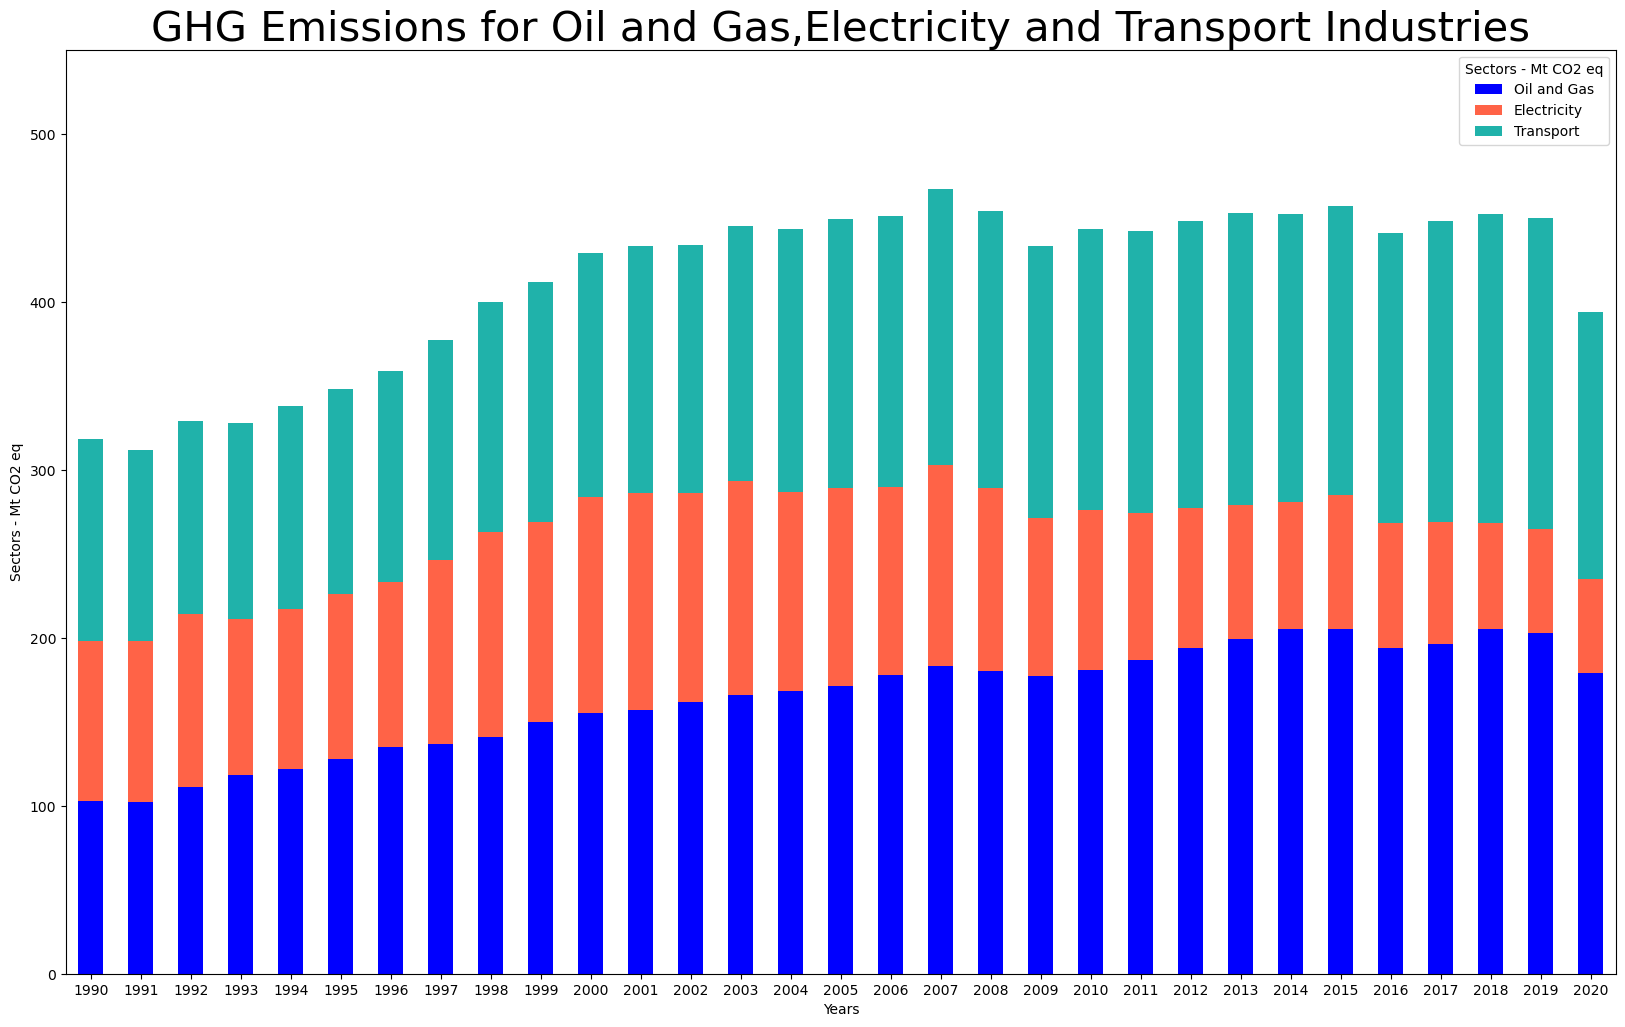

<Figure size 640x480 with 0 Axes>

In [16]:
#Generate a Stacked bar graph of Canada industries for Oil and & gas, Electricity and transport showing GHG emissions per year 

ax = Canada_df.plot.bar(stacked=True, color =['blue', 'tomato','lightseagreen'], figsize=(20,12))
ax.set_title('GHG Emissions for Oil and Gas,Electricity and Transport Industries', fontsize=30)
ax.set_ylim(0,550)

ax.set_xticklabels(["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation=0)

plt.xlabel("Years")
plt.ylabel("Sectors - Mt CO2 eq")


#show cgraph and set layout
plt.show()
plt.tight_layout()
